In [81]:
import numpy as np
import pickle, os, torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import models

os.environ['KMP_DUPLICATE_LIB_OK']='True'

path = os.path.join("experiments_results", "train_seq","F2C_1e4-2e5_nod")

with open(os.path.join(path, "ann_logs.pickle"), "rb") as f:
    ann_logs = pickle.load(f)
    
with open(os.path.join(path, "snn_logs.pickle"), "rb") as f:
    snn_logs = pickle.load(f)

|     | Labels | Pre-training on [0-4] | 1 Epoch | 5 Epochs | 10 Epochs |
| :-: | :----: | :-------------------: | :-----: | :------: | :-------: |
| ANN | [0-4]  | 100.00% / 99.92%     | 94\.78% | 64\.35%  | 44\.23%   |
|     | [5-9]  | -                     | 11\.53% | 97\.51%  | 98\.38%   |
| SNN | [0-4]  | 100\.00% / 99.88%     | 95\.52% | 67\.48%  | 47\.13%   |
|     | [5-9]  | -                     | 39\.28% | 95\.88%  | 97\.32%   |

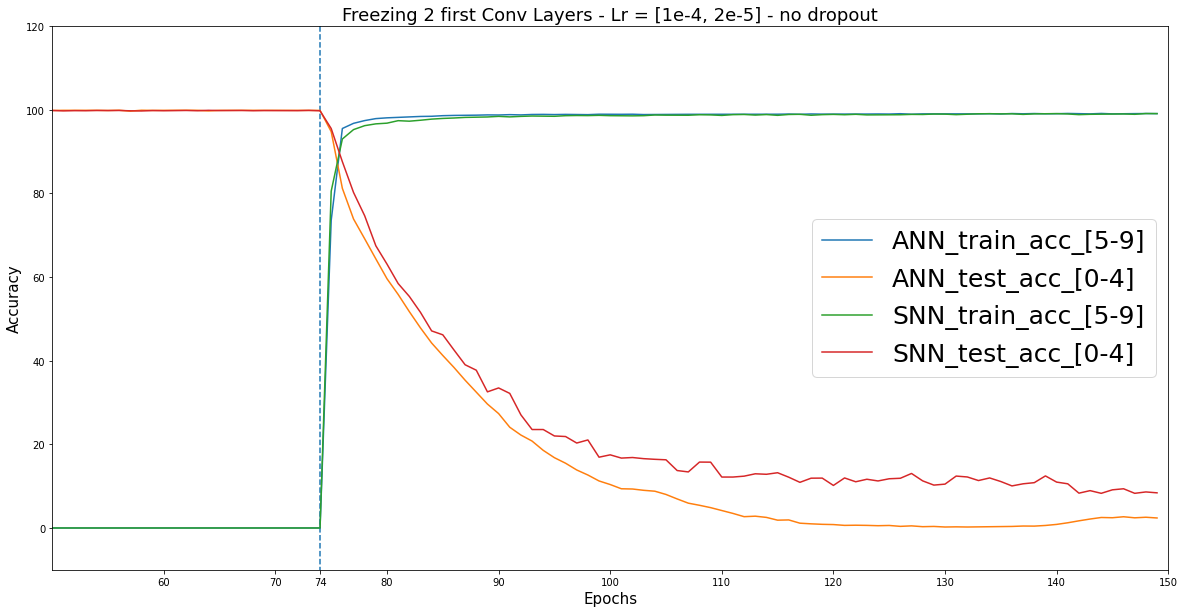

In [82]:
plt.figure(figsize=(20,10))

plt.plot(([0]*75)+ann_logs["test_acc_2"],label="ANN_train_acc_[5-9]")
plt.plot(ann_logs["test_acc_1"], label="ANN_test_acc_[0-4]")

plt.plot(([0]*75)+snn_logs["test_acc_2"], label="SNN_train_acc_[5-9]")
plt.plot(snn_logs["test_acc_1"], label="SNN_test_acc_[0-4]")

plt.legend(fontsize=25)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.title("Freezing 2 first Conv Layers - Lr = [1e-4, 2e-5] - no dropout",fontsize=18)
plt.xlim([50,150])
plt.ylim([-10,120])
plt.vlines(74,-100,200,linestyles="dashed")
_ = plt.xticks([74]+[x for x in range(60, 160,10)])

In [83]:
path = os.path.join("experiments_results", "train_seq","F1C_1e4-1.5e5_nod")

with open(os.path.join(path, "ann_logs.pickle"), "rb") as f:
    ann_logs = pickle.load(f)
    
with open(os.path.join(path, "snn_logs.pickle"), "rb") as f:
    snn_logs = pickle.load(f)

|     | Labels | Pre-training on [0-4] | 1 Epoch | 5 Epochs | 10 Epochs |
| :-: | :----: | :-------------------: | :-----: | :------: | :-------: |
| ANN | [0-4]  | 100\.00% / 99.92%     | 96\.83% | 47\.95%  | 29\.85%   |
|     | [5-9]  | -                     | 4\.08% | 97\.60%  | 98\.63%   |
| SNN | [0-4]  | 100\.00% / 99.88%     | 92\.98% | 53\.47%  | 23\.49%   |
|     | [5-9]  | -                     | 43\.28% | 96\.33%  | 97\.89%   |

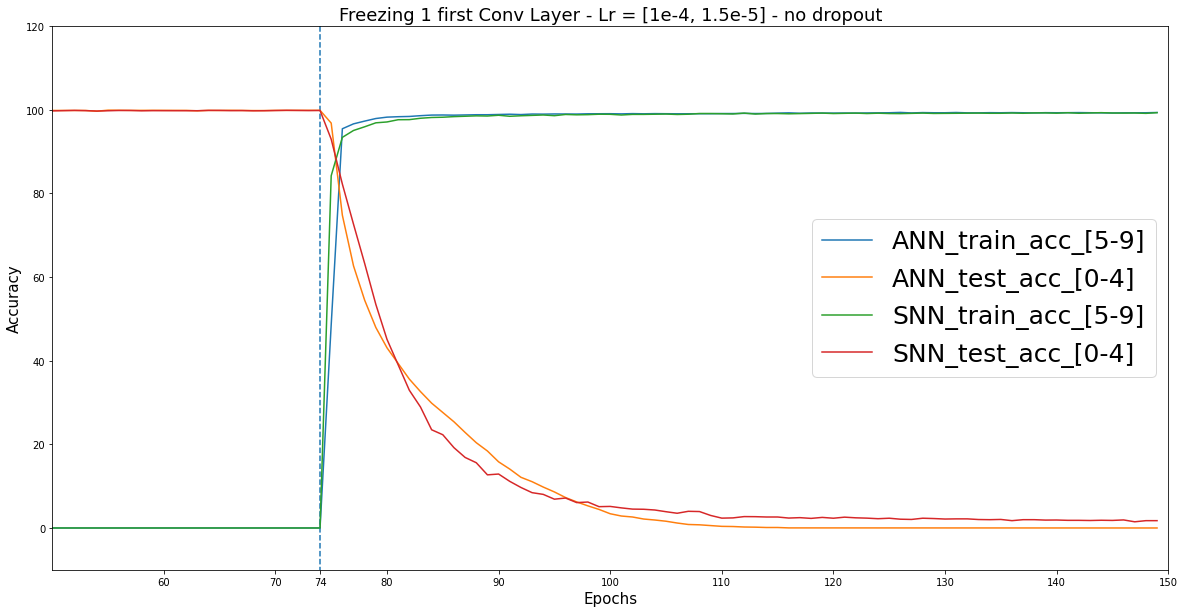

In [87]:
plt.figure(figsize=(20,10))

plt.plot(([0]*75)+ann_logs["test_acc_2"],label="ANN_train_acc_[5-9]")
plt.plot(ann_logs["test_acc_1"], label="ANN_test_acc_[0-4]")

plt.plot(([0]*75)+snn_logs["test_acc_2"], label="SNN_train_acc_[5-9]")
plt.plot(snn_logs["test_acc_1"], label="SNN_test_acc_[0-4]")

plt.legend(fontsize=25)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.title("Freezing 1 first Conv Layer - Lr = [1e-4, 1.5e-5] - no dropout",fontsize=18)
plt.xlim([50,150])
plt.ylim([-10,120])
plt.vlines(74,-100,200,linestyles="dashed")
_ = plt.xticks([74]+[x for x in range(60, 160,10)])

In [90]:
path = os.path.join("experiments_results", "train_seq","F0_1e4-1e5_nod")

with open(os.path.join(path, "ann_logs.pickle"), "rb") as f:
    ann_logs = pickle.load(f)
    
with open(os.path.join(path, "snn_logs.pickle"), "rb") as f:
    snn_logs = pickle.load(f)

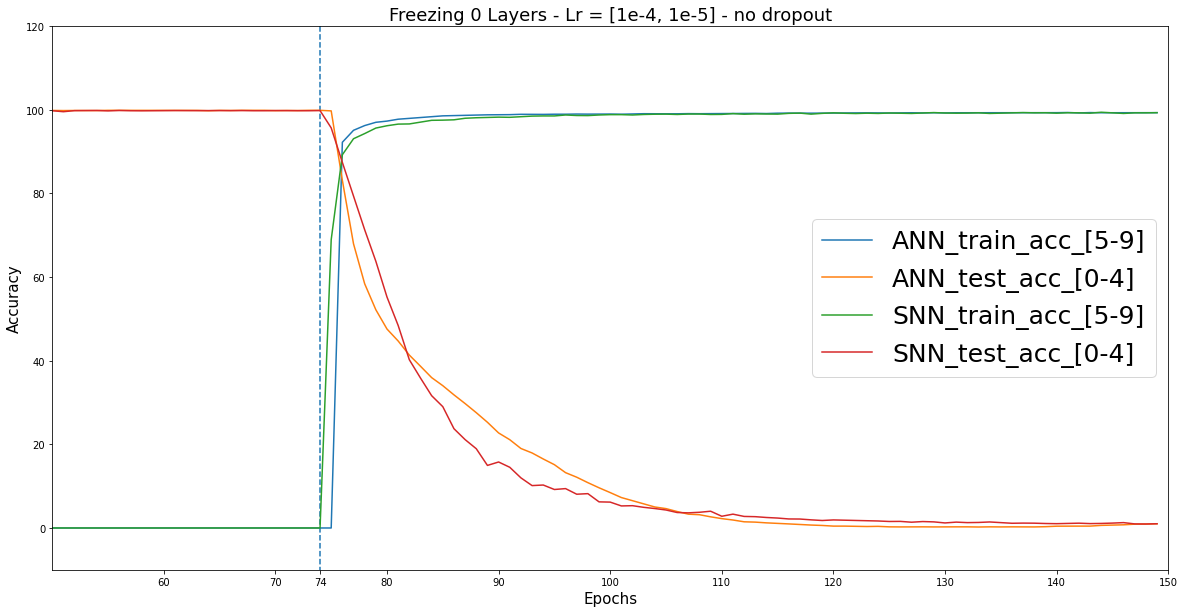

In [92]:
plt.figure(figsize=(20,10))

plt.plot(([0]*75)+ann_logs["test_acc_2"],label="ANN_train_acc_[5-9]")
plt.plot(ann_logs["test_acc_1"], label="ANN_test_acc_[0-4]")

plt.plot(([0]*75)+snn_logs["test_acc_2"], label="SNN_train_acc_[5-9]")
plt.plot(snn_logs["test_acc_1"], label="SNN_test_acc_[0-4]")

plt.legend(fontsize=25)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.title("Freezing 0 Layers - Lr = [1e-4, 1e-5] - no dropout",fontsize=18)
plt.xlim([50,150])
plt.ylim([-10,120])
plt.vlines(74,-100,200,linestyles="dashed")
_ = plt.xticks([74]+[x for x in range(60, 160,10)])

In [ ]:
print("\n##### Pre-training on [0-4] #####")
print("ANN Train Acc [0-4]:  {:.2f}%".format(max(ann_logs["train_acc_1"])))
print("ANN Test Acc [0-4]:   {:.2f}%\n".format(max(ann_logs["test_acc_1"])))

print("SNN Train Acc [0-4]:  {:.2f}%".format(max(snn_logs["train_acc_1"])))
print("SNN Test Acc [0-4]:   {:.2f}%".format(max(snn_logs["test_acc_1"])))

print("\n##### 2nd phase training on [5-9] #####")
print("=> After 1 epoch :")
print("\tANN Test Acc [0-4]:  {:.2f}%".format((ann_logs["test_acc_1"][75])))
print("\tANN Train Acc [5-9]:  {:.2f}%".format((ann_logs["train_acc_2"][0])))
print("\tSNN Test Acc [0-4]:  {:.2f}%".format((snn_logs["test_acc_1"][75])))
print("\tSNN Train Acc [5-9]:  {:.2f}%".format((snn_logs["train_acc_2"][0])))
print("=> After 5 epochs :")
print("\tANN Test Acc [0-4]:  {:.2f}%".format((ann_logs["test_acc_1"][79])))
print("\tANN Train Acc [5-9]:  {:.2f}%".format((ann_logs["train_acc_2"][4])))
print("\tSNN Test Acc [0-4]:  {:.2f}%".format((snn_logs["test_acc_1"][79])))
print("\tSNN Train Acc [5-9]:  {:.2f}%".format((snn_logs["train_acc_2"][4])))
print("=> After 10 epochs :")
print("\tANN Test Acc [0-4]:  {:.2f}%".format((ann_logs["test_acc_1"][84])))
print("\tANN Train Acc [5-9]:  {:.2f}%".format((ann_logs["train_acc_2"][9])))
print("\tSNN Test Acc [0-4]:  {:.2f}%".format((snn_logs["test_acc_1"][84])))
print("\tSNN Train Acc [5-9]:  {:.2f}%".format((snn_logs["train_acc_2"][9])))